# Analysis of NGS results from GPU and CPU pipelines

## Comparison of variant call-sets (VCF files)

### DATA-PREP: Create datasets showing the intersection, union and complement of VCF files from GPU and CPU pipelines
* Results of this step is used in the downstream analysis/visualisation stage

In [1]:
# Intersection of GPU vs CPU variant call-sets of Parabricks test sample (link)
PB_PATH="../data/internal_testdata/Parabricks_sample"
!bcftools isec -p Sample1 {PB_PATH}/pbsample_pbrun_fq2bam_GPU.bam.vcf.gz {PB_PATH}/pbsample_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz

# Intersection of GPU vs CPU variant call-sets of sample - Garvan_NA12878_HG001_HiSeq_Exome (link)
NA12878_PATH="../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome"
!bcftools isec -p Sample2 {NA12878_PATH}/Garvan_NA12878_HG001_HiSeq_Exome_pbrun_fq2bam_GPU.bam.vcf.gz {NA12878_PATH}/Garvan_NA12878_HG001_HiSeq_Exome_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz

In [2]:
# Parabricks test sample
## Count number of variants private (unique) and common to GPU vs CPU variant call-sets
!cat Sample1/README.txt
!grep -cv "#" Sample1/*vcf

This file was produced by vcfisec.
The command line was:	bcftools isec  -p Sample1 ../data/internal_testdata/Parabricks_sample/pbsample_pbrun_fq2bam_GPU.bam.vcf.gz ../data/internal_testdata/Parabricks_sample/pbsample_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz

Using the following file names:
Sample1/0000.vcf	for records private to	../data/internal_testdata/Parabricks_sample/pbsample_pbrun_fq2bam_GPU.bam.vcf.gz
Sample1/0001.vcf	for records private to	../data/internal_testdata/Parabricks_sample/pbsample_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz
Sample1/0002.vcf	for records from ../data/internal_testdata/Parabricks_sample/pbsample_pbrun_fq2bam_GPU.bam.vcf.gz shared by both	../data/internal_testdata/Parabricks_sample/pbsample_pbrun_fq2bam_GPU.bam.vcf.gz ../data/internal_testdata/Parabricks_sample/pbsample_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz
Sample1/0003.vcf	for records from ../data/internal_testdata/Parabricks_sample/pbsample_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.

In [3]:
# Garvan_NA12878_HG001_HiSeq_Exome sample
## Count number of variants private (unique) and common to GPU vs CPU variant call-sets
!cat Sample2/README.txt
!grep -cv "#" Sample2/*vcf

This file was produced by vcfisec.
The command line was:	bcftools isec  -p Sample2 ../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome/Garvan_NA12878_HG001_HiSeq_Exome_pbrun_fq2bam_GPU.bam.vcf.gz ../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome/Garvan_NA12878_HG001_HiSeq_Exome_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz

Using the following file names:
Sample2/0000.vcf	for records private to	../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome/Garvan_NA12878_HG001_HiSeq_Exome_pbrun_fq2bam_GPU.bam.vcf.gz
Sample2/0001.vcf	for records private to	../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome/Garvan_NA12878_HG001_HiSeq_Exome_bwa-mem_CPU.sam.bam_markdup.bam_BQSR.bam.vcf.gz
Sample2/0002.vcf	for records from ../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome/Garvan_NA12878_HG001_HiSeq_Exome_pbrun_fq2bam_GPU.bam.vcf.gz shared by both	../data/internal_testdata/Garvan_NA12878_HG001_HiSeq_Exome/Garvan_NA12878_HG001_HiSeq_Exome_pbrun_fq2bam_GPU.bam.vc

#### Summary: Number private (unique) and common variants

| Sample     | GPU_ONLY (Private to GPU) | CPU_ONLY (Private to GPU) | GPU_CPU_COMMON (Common to both GPU and CPU) |
|------------|---------------------------|---------------------------|---------------------------------------------|
| Sample 1   | 1645                      | 614                       | 126075                                      |
| Sample 2   | 3964                      | 1010                      | 809914                                      |

### The number private (unique) and common variants in the two datasets (GPU & CPU call-sets)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
sns.set_palette("pastel")
sns.set_style("whitegrid")

In [5]:
vc_counts = {"Sample 1":[1645, 614, 126075], "Sample 2":[3964, 1010, 809914]}
df = pd.DataFrame(vc_counts).T.rename(columns={0: "GPU_ONLY", 1: "CPU_ONLY", 2: "GPU_CPU_COMMON" })
df

,GPU_ONLY,CPU_ONLY,GPU_CPU_COMMON
Sample 1,1645,614,126075
Sample 2,3964,1010,809914


In [6]:
df["GPU_ONLY %"], df["CPU_ONLY %"], df["GPU_CPU_COMMON %"] = zip(*df.apply(lambda x: (np.round(x["GPU_ONLY"]/float(x.sum(axis=0))*100,3), 
                                                                                 np.round(x["CPU_ONLY"]/float(x.sum(axis=0))*100,3), 
                                                                                 np.round(x["GPU_CPU_COMMON"]/float(x.sum(axis=0))*100,3)),
                                                                      axis=1))

In [7]:
df

,GPU_ONLY,CPU_ONLY,GPU_CPU_COMMON,GPU_ONLY %,CPU_ONLY %,GPU_CPU_COMMON %
Sample 1,1645,614,126075,1.282,0.478,98.24
Sample 2,3964,1010,809914,0.486,0.124,99.39


In [8]:
sample_1_counts = df.iloc[0][["GPU_ONLY", "CPU_ONLY", "GPU_CPU_COMMON"]].to_list()
sample_1_pct = df.iloc[0][["GPU_ONLY %", "CPU_ONLY %", "GPU_CPU_COMMON %"]].to_list()

print(f"Sample 1 counts: {sample_1_counts}")
print(f"Sample 1 percentages: {sample_1_pct}")

sample_2_counts = df.iloc[1][["GPU_ONLY", "CPU_ONLY", "GPU_CPU_COMMON"]].to_list()
sample_2_pct = df.iloc[1][["GPU_ONLY %", "CPU_ONLY %", "GPU_CPU_COMMON %"]].to_list()

print(f"Sample 2 counts: {sample_2_counts}")
print(f"Sample 2 percentages: {sample_2_pct}")

Sample 1 counts: [1645.0, 614.0, 126075.0]
Sample 1 percentages: [1.282, 0.478, 98.24]
Sample 2 counts: [3964.0, 1010.0, 809914.0]
Sample 2 percentages: [0.486, 0.124, 99.39]


Text(0.5, 0.98, 'Number of variants')

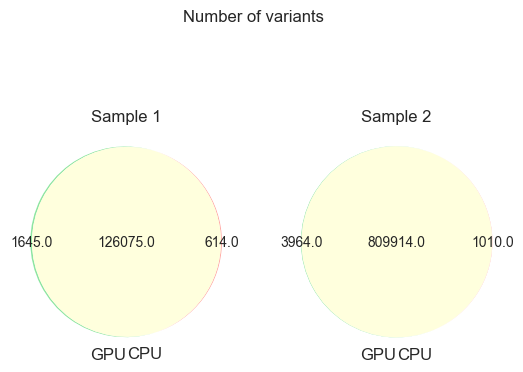

In [9]:
colors_list = sns.color_palette("pastel").as_hex()
figure, (ax1, ax2) = plt.subplots(1, 2)
venn2(subsets = sample_1_counts, set_labels = ('GPU', 'CPU'), set_colors=(colors_list[2], colors_list[3]), alpha=1,ax=ax1)
venn2(subsets = sample_2_counts, set_labels = ('GPU', 'CPU'), set_colors=(colors_list[2], colors_list[3]), alpha=1, ax=ax2)

ax1.set_title("Sample 1")
ax2.set_title("Sample 2")
plt.suptitle("Number of variants")

Text(0.5, 0.98, 'Percentage of variants')

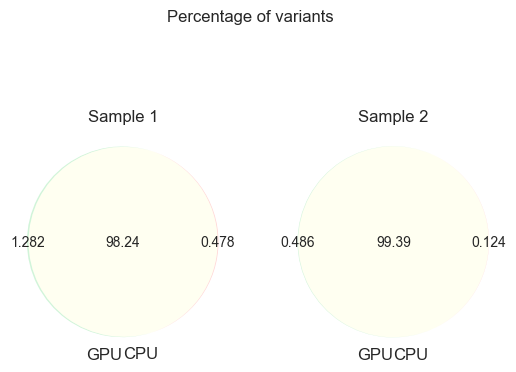

In [10]:
figure, (ax1, ax2) = plt.subplots(1, 2)
venn2(subsets = sample_1_pct, set_labels = ('GPU', 'CPU'), set_colors=(colors_list[2], colors_list[3]), ax=ax1)
venn2(subsets = sample_2_pct, set_labels = ('GPU', 'CPU'), set_colors=(colors_list[2], colors_list[3]), ax=ax2)

ax1.set_title("Sample 1")
ax2.set_title("Sample 2")
plt.suptitle("Percentage of variants")

#### Summary: Based on the Sample 1 and Sample 2 results,
* A large majority of variants are common to both pipelines, i.e., a large majority of variants are identified in both pipelines
    * ~98%-99% variants are identified by both GPU and CPU pipelines
* The number of variants identified only in the GPU pipeline is larger than the variants identified only in the CPU pipeline
    * The difference between the number of private variants was `~2.6x times (1645/614)` for `Sample 1` and `~3.9x times (3964/1010)` for `Sample 2`

## Analysis of processing time of GPU and CPU pipeline

In [11]:
df_times = pd.read_table("metadata/processing_time.tsv")
df_times.head()

,Platform,Sample,BWA-mem mapping,Samtools sort,Duplicate marking and BQSR calculation,ApplyBQSR and HaplotypeCalling
0,CPU,Sample1,7m 10s,20m 2s,28m 44s,116m 25s
1,GPU,Sample1,2m 20s,1m 0s,0m 40s,1m 44s
2,CPU,Sample2,19m 46s,35m 29s,76m 28s,183m 33s
3,GPU,Sample2,6m 2s,2m 0s,0m 50s,2m 54s


*`BWA-mem mapping`, `Samtools sort`, `Duplicate marking and BQSR calculation` and `ApplyBQSR and HaplotypeCalling`: Different stages/processes in the pipeline*

In [12]:
df_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Platform                                4 non-null      object
 1   Sample                                  4 non-null      object
 2   BWA-mem mapping                         4 non-null      object
 3   Samtools sort                           4 non-null      object
 4   Duplicate marking and BQSR calculation  4 non-null      object
 5   ApplyBQSR and HaplotypeCalling          4 non-null      object
dtypes: object(6)
memory usage: 324.0+ bytes


In [13]:
def convert_to_minutes(time_str_series):
    """Convert time durations to seconds"""
    
    total_minutes = []
    for time_str in time_str_series.to_list():
        try:
            # Split the string by 'm' and 's' to extract minutes and seconds
            minutes, seconds = time_str.split('m')[0].strip(), time_str.split('m')[1].split('s')[0].strip()
            # Convert to integers and calculate total minutes
            total_minutes.append((int(minutes)*60) + int(seconds))
        except (ValueError, IndexError):
            print(f"Invalid time string: {time_str}. Skipping.")
    return total_minutes

In [14]:
# DF with time duration in seconds
df_seconds = df_times[["Platform", "Sample"]].copy()
df_seconds["BWA-mem mapping"], \
df_seconds["Samtools sort"], \
df_seconds["Duplicate marking and BQSR calculation"], \
df_seconds["ApplyBQSR and HaplotypeCalling"] = zip(*df_times[["BWA-mem mapping",  
                                                           "Samtools sort",  
                                                           "Duplicate marking and BQSR calculation", 
                                                           "ApplyBQSR and HaplotypeCalling"]].apply(lambda x: convert_to_minutes(x), axis=1))

In [15]:
df_seconds

,Platform,Sample,BWA-mem mapping,Samtools sort,Duplicate marking and BQSR calculation,ApplyBQSR and HaplotypeCalling
0,CPU,Sample1,430,1202,1724,6985
1,GPU,Sample1,140,60,40,104
2,CPU,Sample2,1186,2129,4588,11013
3,GPU,Sample2,362,120,50,174


In [16]:
# Pivot the table
df_mins_transformed = df_seconds.melt(id_vars=['Sample', 'Platform'], var_name='Process', value_name='Time (in seconds)')
df_mins_transformed

,Sample,Platform,Process,Time (in seconds)
0,Sample1,CPU,BWA-mem mapping,430
1,Sample1,GPU,BWA-mem mapping,140
2,Sample2,CPU,BWA-mem mapping,1186
3,Sample2,GPU,BWA-mem mapping,362
4,Sample1,CPU,Samtools sort,1202
5,Sample1,GPU,Samtools sort,60
6,Sample2,CPU,Samtools sort,2129
7,Sample2,GPU,Samtools sort,120
8,Sample1,CPU,Duplicate marking and BQSR calculation,1724
9,Sample1,GPU,Duplicate marking and BQSR calculation,40


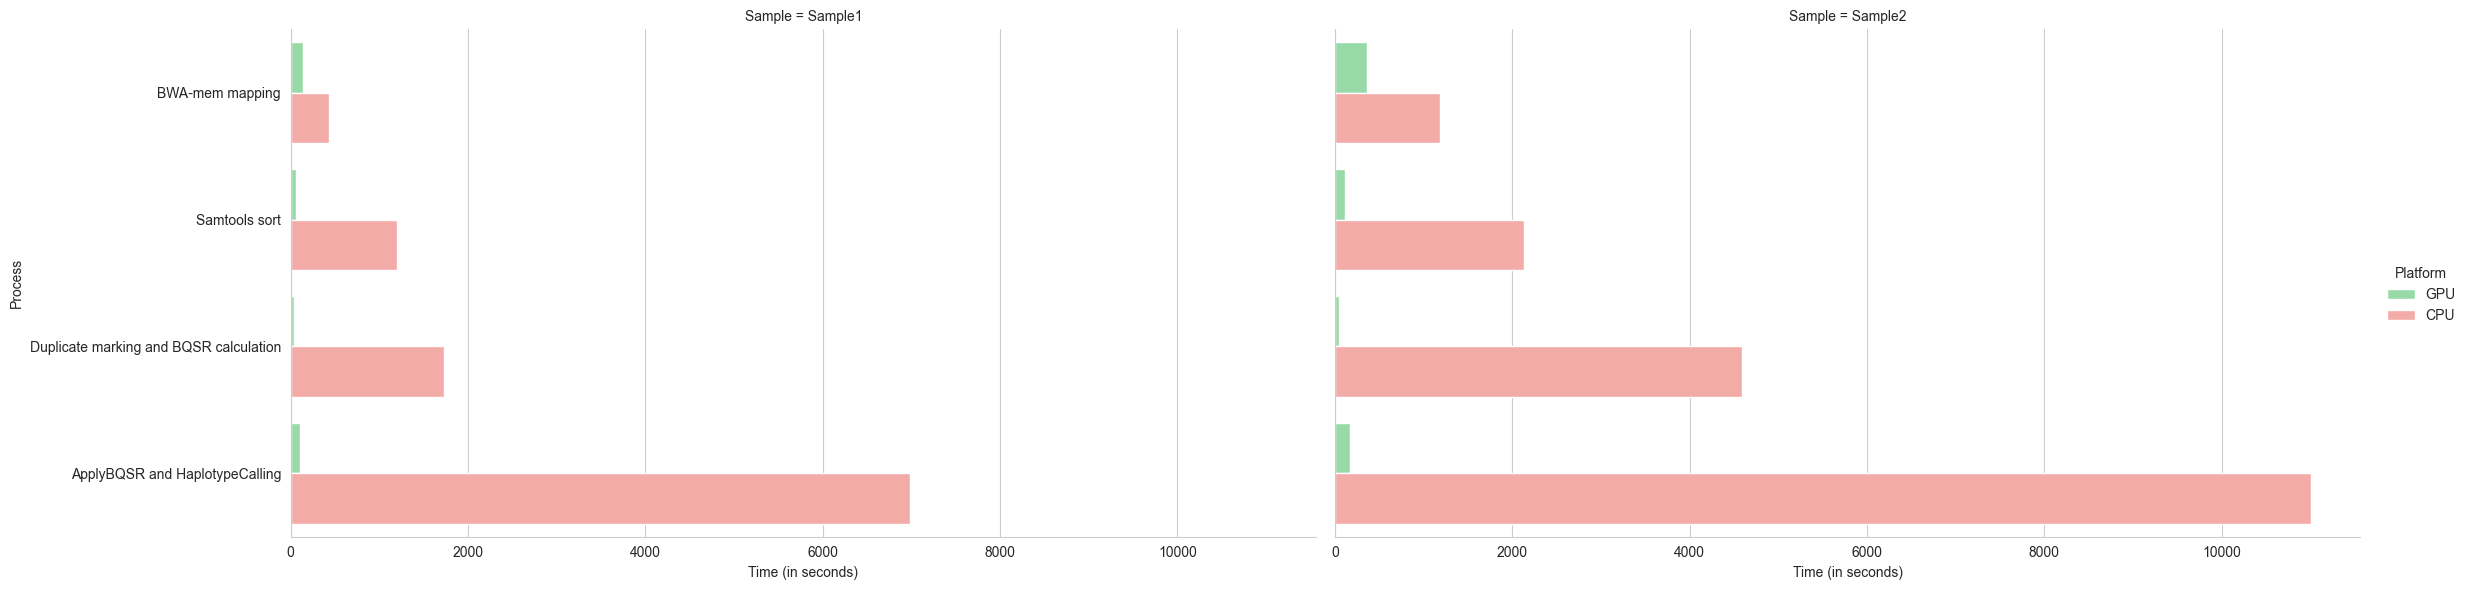

In [17]:
sns.catplot(
    data=df_mins_transformed, kind="bar",
    x="Time (in seconds)", y="Process", 
    col="Sample", hue="Platform", 
    hue_order=["GPU","CPU"], palette=[colors_list[2], colors_list[3]],
    height=6, aspect=2,
)

#### Summary: Processing time
* The processing time of the GPU pipeline is considerably smaller than that of the CPU pipeline
